In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
from pandas import DataFrame

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
database_path = "Resources/hawaii.sqlite"

In [5]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [6]:
engine.table_names()

<ipython-input-6-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['measurement', 'station']

## Printing using Query

In [13]:
query = """
SELECT *
FROM measurement"""

In [7]:
# data = engine.execute(query)
# for record in data:
#     print(record)

## Printing using PANDA

In [8]:
# Query All Records in the the Database
station_data = pd.read_sql("SELECT * FROM station", engine)
measurement_data = pd.read_sql("SELECT * FROM measurement", engine)

In [9]:
# Preview the Data
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [10]:
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


## Reflection | Automapping

In [11]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [12]:
# Use the Base class to reflect the database tables
# Base represents our ORM database as a whole
Base.prepare(engine, reflect=True)

In [13]:
# reflect an existing database into a new model

# reflect the tables

In [14]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# # ----REF---- method to PULL THE ENTIRE FIRST ROW as Dictionary ----REF---- 
# first_date.__dict__

# Find the most recent date in the data set.
session.query(Measurement.date).order_by(desc(Measurement.date)).first()

('2017-08-23',)

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


In [19]:
# Calculate the date one year from the last date in data set.
# date 1 year ago from date
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [20]:
# Perform a query to retrieve the data and precipitation scores
# last_year_desc = session.query(Measurement).order_by(desc(Measurement.date)).filter(Measurement.date.between("2016-08-24", "2017-08-23"))
# last_year_desc = session.query(Measurement).filter(Measurement.date.between("2016-08-24", "2017-08-23"))
# last_year_desc = session.query(Measurement).filter(Measurement.date > '2016-08-23').all()
# last_year_desc = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date > '2016-08-23')
last_year_desc = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all()

In [21]:
# print(last_year_desc)

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_year_desc, columns = ["date","prcp"])
df.set_index(df.date, inplace = True)

In [23]:
# Sort the dataframe by date
df.sort_index(inplace = True)

In [24]:
# Drop duplicate date column
df.drop(axis=1, labels="date", inplace=True)

In [25]:
# Drop NAN rows
df.dropna(inplace=True)

In [26]:
df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


<Figure size 1440x1080 with 0 Axes>

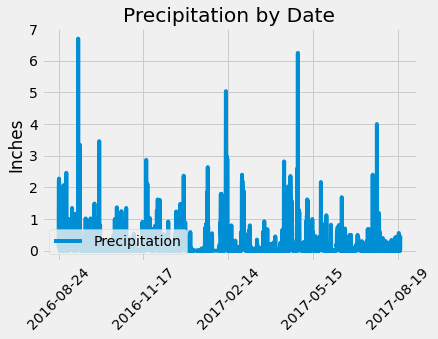

In [39]:
plt.figure(figsize=(20,15))
df.plot(rot=45, label='Inline label')

# # Give our chart some labels and a tile
plt.title("Precipitation by Date")
plt.legend(['Precipitation'],loc='lower left')
# plt. figlegend((line1),('Precipitation'),')
plt.xlabel("")
plt.ylabel("Inches");

plt.show()

In [40]:
# # -----REF-----to playaround with formatting---
# # -----REF-----to playaround with formatting---
# x_axis = df.arange(len(date))

# drug_list

# timepoint_count = df[['Drug Regimen','Timepoint']].groupby('Drug Regimen').count()

# y_axis = list(timepoint_count['Timepoint'])

In [41]:
# # # -----REF-----to playaround with formatting---
# # # -----REF-----to playaround with formatting---
# ##  Use Pandas Plotting with Matplotlib to plot the data

# # # ------ Matplotlib's pyplot--------------
# plt.figure(figsize=(12,6))

# # Tell matplotlib that we will be making a bar chart
# # Users is our y axis and x_axis is, of course, our x axis
# # We apply align="edge" to ensure our bars line up with our tick marks
# plt.bar(x_axis, y_axis, color='r', align="edge")

# # Tell matplotlib where we would like to place each of our x axis headers
# # tick_locations = [value for value in x_axis]
# plt.xticks(x_axis, drug_list, rotation=45)

# # Sets the x limits of the current chart
# plt.xlim(-0.35, len(x_axis)+0.20)

# # Sets the y limits of the current chart
# plt.ylim(0, max(y_axis)+50)

# # Give our chart some labels and a tile
# plt.title("For All Mice")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Total Number of Timepoints");

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [44]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [46]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
last_year_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-08-23').all()

In [47]:
# Filter by the station with the highest number of observations.
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Query the last 12 months of temperature observation data for this station.
active_station = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > "2016-08-18").filter(Measurement.station == "USC00519281").all()

In [49]:
df = pd.DataFrame(active_station, columns = ["date", "tobs"])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    356 non-null    object 
 1   tobs    356 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB


In [51]:
df.sort_values(by=['date'], inplace = True)

In [52]:
df.head()

,date,tobs
0,2016-08-19,79.0
1,2016-08-20,81.0
2,2016-08-21,79.0
3,2016-08-22,78.0
4,2016-08-23,77.0


<Figure size 1440x1080 with 0 Axes>

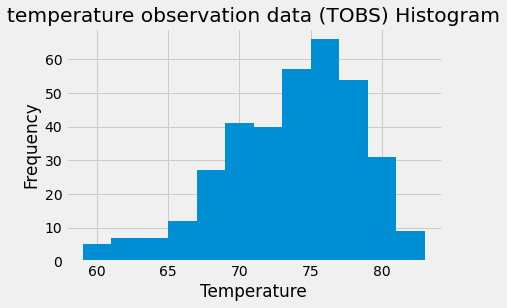

In [53]:
# # A histogram shows the number of occurrences of different values in a dataset.
# # These unique values will be grouped into ranges. These ranges are called bins or buckets. In Python, the default number of bins is 10
plt.figure(figsize=(20,15))
df.hist(bins = 12)

# # Give our chart some labels and a tile
plt.title("temperature observation data (TOBS) Histogram")
plt.xlabel("Temperature")
plt.ylabel("Frequency");

plt.show()

In [54]:
# Plot the results as a histogram with bins=12.

# Close session

In [55]:
# Close Session
session.close()